<h2>LBM as a module </h2>
<p> Even though the LBM (Palabos) notebooks in this directory are very nice to use, they do not scale easily to a cluster or similar. This is why a module would be appropriate. Ideally, you would give it the correct properties, then run the functionality. If this can be made to scale nicely on a cluster (either by running multiple scripts or having parallel code) that would be an added benefit. </p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from lbm import simulation as sim
from lbm import common as helper

In [2]:
configuration = {
    "reynolds": 91,
    "horizontal": 500,
    "vertical": 180,
    "scale": 20,
    "speed": 0.04
} 


In [3]:
#show here or save to file?
show_visualisation = True

#how many iterations in total
max_iteration = 10000

#modulo how many pictures
snap_iteration = 100

#file names
base_directory = "data/lbm_mod/"
base_file_name = "karman_sheet" 

In [4]:
try:
    simulation = sim.lattice_boltzmann(configuration)
except AssertionError:
    print("The configuration dictionary was incomplete.")

In [5]:
circular_obstacle = lambda x,y: (x-simulation.horizontal/4)**2+(y-simulation.vertical/2)**2 < simulation.scale**2
 
try:
    simulation.set_obstacle(circular_obstacle) 
except:
    print("Something went wrong. Is your obstacle correct?")

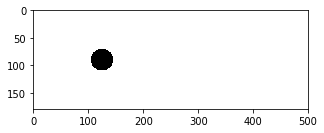

In [6]:
#What does the obstacle look like? 
obstacle_data = np.fromfunction( circular_obstacle, (simulation.horizontal, simulation.vertical))

plt.subplot(211) 
plt.imshow(obstacle_data.transpose(), cmap='Greys',  interpolation='nearest')
plt.savefig('blkwht.png')

plt.show()

In [7]:
default_equilibrium = lambda rho, velocity: helper.equilibrium(rho, velocity, configuration["horizontal"], configuration["vertical"])

try:
    simulation.set_equilibrium(default_equilibrium) 
except:
    print("Something went wrong. Is your equilibrium correct?")  

In [8]:
default_velocity = helper.velocity(configuration["speed"], configuration["vertical"])

try:
    simulation.set_inflow_velocity(default_velocity)
except:
    print("Something went wrong. is your inflow_velocity correct? ")

In [9]:
try: 
    simulation.initialise ()
except:
    print("Initialisation failed. What is happening?")


In [10]:
simulation.propagate()

Printing iteration 0/10000.


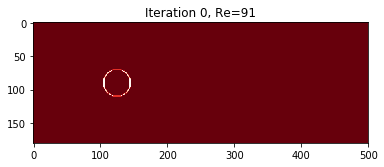

Printing iteration 1/10000.


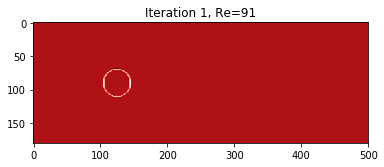

Printing iteration 100/10000.


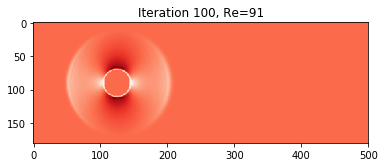

Printing iteration 200/10000.


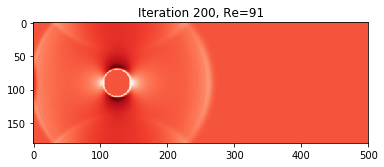

Printing iteration 300/10000.


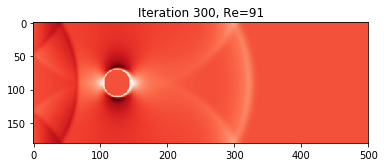

Printing iteration 400/10000.


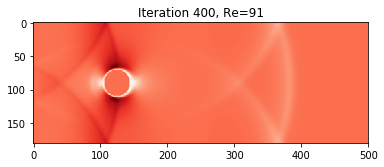

Printing iteration 500/10000.


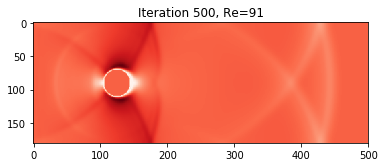

Printing iteration 600/10000.


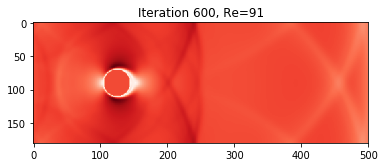

Printing iteration 700/10000.


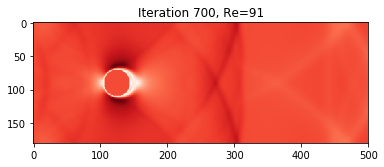

Propagation failed, what is happening?


In [11]:
for iteration in range(max_iteration):
    try:
        simulation.propagate()
    except:
        print("Propagation failed, what is happening?")
        break
        raise
    
    if iteration%snap_iteration == 0 or iteration==1:
        print ("Printing iteration %d/%d." %(iteration, max_iteration))
        
        velocities = simulation.get_velocities ();
        speed = np.sqrt(velocities[0]**2+velocities[1]**2)
        try:
            plt.clf()
            plt.imshow(speed.transpose(),cmap=cm.Reds)
            plt.title("Iteration %d, Re=%d" % (iteration, configuration["reynolds"]))
            if show_visualisation:
                plt.show()
            else:
                plt.savefig("%s/%s_re%d_iteration%d.png" %(base_directory, base_file_name, configuration["reynolds"], iteration))
            plt.close()
        except FileNotFoundError:
            print("Make the directory %s first." % base_directory)
            break
            raise

In [12]:
print("If this prints, everything worked on reboot")

If this prints, everything worked on reboot
